## Imports and setup

In [ ]:
# Import necessary dependencies
import matplotlib
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

In [ ]:
# Set up the plot style and default size for all plots created with matplotlib
plt.style.use('ggplot')
matplotlib.rcParams['figure.figsize'] = (12, 8)

In [ ]:
# Read data from the csv
df = pd.read_csv('dataset\\movies.csv')
df

In [ ]:
# Display the five first rows
df.head()

In [ ]:
# Verify if missing data exists
for col in df.columns:
    percentage_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, percentage_missing))

In [ ]:
# Display data types for the columns
df.dtypes

In [ ]:
# Change the type of columns to integer and replace NaN values with zero

df['budget'] = df['budget'].fillna(0).astype('int64')
# The fillna() is a method is used to fill missing values (NaN) in a DataFrame or Series with a specified value or method
df['gross'] = df['gross'].fillna(0).astype('int64')
df.head()

## Data Cleaning

In [ ]:
# Clean date objects to convert them to dates

# r'': The r before the quotes indicates a raw string. Raw strings treat backslashes (\) as literal characters and do not interpret them as escape characters.
# \s*: matches zero or more whitespace characters.
# \(: matches the literal opening parenthesis.
# .*: matches zero or more of any character (except a newline).
# \): matches the literal closing parenthesis ).
country_name_pattern = r'\s*\(.*\)'
cleaned_string_dates = df['released'].str.replace(country_name_pattern, '', regex=True)
# [None]*len(released_clean): This creates a list containing None repeated as many times as there are elements in cleaned_string_dates
# pd.Series([...]): a function from pandas that creates a Series, which is a one-dimensional array-like object that can hold any data type. It is similar to a column in a DataFrame.
cleaned_released_dates = pd.Series([None]*len(cleaned_string_dates))
accepted_formats = ['%B %d, %Y', '%B %Y', '%Y']

# Verify if dates are in the expected format
for index, date_item in enumerate(cleaned_string_dates):
    converted_item = None
    for date_format in accepted_formats:
        try:
            converted_item = pd.to_datetime(date_item, format=date_format)
            break
        except:
            pass
        
    # The .iloc indexer in pandas is used for integer-location based indexing and selection by position
    cleaned_released_dates.iloc[index] = converted_item
    if converted_item is None:
        print(f'Date {date_item} could not be converted to formats: {accepted_formats}')
    
# Create correct year column

# errors='coerce': any values that cannot be converted to a valid datetime format will be set to NaT (Not a Time), which represents missing or null date values in pandas.
cleaned_released_dates = pd.to_datetime(cleaned_released_dates, errors='coerce')
df['yearcorrect'] = cleaned_released_dates.dt.year.astype('Int64').astype(str)
df.head()

In [ ]:
# Sort values of the column 'gross'

# inplace=False: This means that the sorting operation will not modify the original DataFrame. Instead, it will return a new DataFrame with the sorted values.
# inplace=True: If set to True, the sorting operation will modify the original DataFrame in place, and no new DataFrame will be returned.
# ascending=False: This means that the sorting will be done in descending order.
# ascending=True: If set to True, the sorting will be done in ascending order, meaning the gross column will be sorted from lowest to highest.
df = df.sort_values(by=['gross'], inplace=False, ascending=False)

In [ ]:
# Drop duplicates to show only the distinct ones
df['company'].drop_duplicates().sort_values(ascending=False)

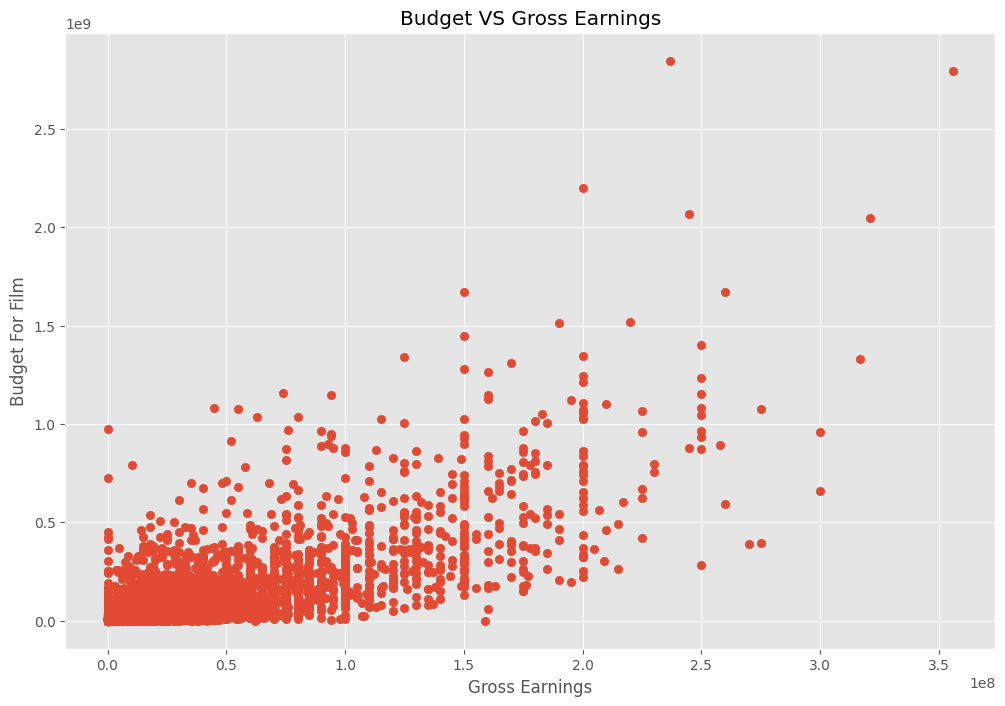

In [27]:
# Scatter plot with the budget and the gross
plt.scatter(x=df['budget'], y=df['gross'])
plt.title('Budget VS Gross Earnings')
plt.xlabel('Gross Earnings')
plt.ylabel('Budget For Film')
plt.show()